# Segmentez des clients d'un site e-commerce -Partie(3/3):Simulation

## Description: 

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

## Objectif:

- Comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles

- Fournir à Olist, une segmentation de ses clients avec une description actionable de cette segmantation et sa logique sous-jacente

- Fournir à Olist, une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temp

# 1.Maintenance <a class="anchor" id="partie1"></a>

In [1]:
# Librairies graphiques, mathématiques et de manipulation de données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import timedelta 
import plotly.express as px

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# Méthodes de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
#from yellowbrick.cluster import KElbowVisualizer
#from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
# Metrics de Clustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [2]:
#Importation des données RFM avec les avis
dataSet = pd.read_csv("data_rmf.csv",index_col=0)
rfm=dataSet.drop(columns={'Avis','customer_unique_id'})

In [3]:
print("La date d'achat la plus récente 2018-09-03 correspond à un nombre de jours écoulé = {} jours et la date d'achat la plus ancienne 2016-10-04 correspond à un nombre de jours écoulé = {} jours.".format(rfm.Récence.min(),rfm.Récence.max()))

La date d'achat la plus récente 2018-09-03 correspond à un nombre de jours écoulé = 0 jours et la date d'achat la plus ancienne 2016-10-04 correspond à un nombre de jours écoulé = 699 jours.


In [4]:
F0 = rfm[rfm.Récence>=60]

cluster_F0 = KMeans(n_clusters=4) # Clustering with KMeans by using the best k 
modèle_F0 = cluster_F0.fit(F0)

In [168]:
F1 = rfm[rfm.Récence>=45]

cluster_F1 = KMeans(n_clusters=4)
modèle_F1 = cluster_F1.fit(F1)

F1_pred = modèle_F0.predict(F1) # The clustering of the F1 database is predicted by using the model F0  

In [169]:
rand_0 = adjusted_rand_score(modèle_F1.labels_, F1_pred)
rand_0 # Rand score computed the similarity between predicted and true clusters after 5 days. 

0.9733434287109333

In [170]:
F2 = rfm[rfm.Récence>=40]

cluster_F2 = KMeans(n_clusters=4)
modèle_F2 = cluster_F2.fit(F2)

F2_Predict = modèle_F0.predict(F2)

In [171]:
rand_1 = adjusted_rand_score(modèle_F2.labels_, F2_Predict)
rand_1 # Rand score computed the similarity between predicted and true clusters after 10 days. 

0.9621094601999542

In [172]:
F3 = rfm[rfm.Récence>=35]

cluster_F3 = KMeans(n_clusters=4)
modèle_F3 = cluster_F3.fit(F3)

F3_pred = modèle_F0.predict(F3)

In [173]:
rand_2 = adjusted_rand_score(modèle_F3.labels_, F3_pred)
rand_2 # Rand score computed the similarity between predicted and true clusters after 15 days. 

0.9351914579982035

In [174]:
F4 = rfm[rfm.Récence>30]

cluster_F4 = KMeans(n_clusters=4)
modèle_F4 = cluster_F4.fit(F4)

F4_pred = modèle_F0.predict(F4)

In [175]:
rand_3 = adjusted_rand_score(modèle_F4.labels_, F4_pred)
rand_3 # Rand score computed the similarity between predicted and true clusters after 20 days. 

0.9251263119529893

In [177]:
F5 = rfm[rfm.Récence>=20]

cluster_F5 = KMeans(n_clusters=4)
modèle_F5 = cluster_F5.fit(F5)

F5_pred = modèle_F0.predict(F5)

In [178]:
rand_4 = adjusted_rand_score(modèle_F5.labels_, F5_pred)
rand_4 # Rand score computed the similarity between predicted and true clusters after 25 days. 

0.6791978530611624

In [179]:
rand = ({"5":[rand_0],"10":[rand_1],"15":[rand_2],"20":[rand_3],"25":[rand_4]})
rand = pd.DataFrame(rand).T.reset_index()
rand.columns = ["Temps","Adjusted Rand Score"]
rand

,Temps,Adjusted Rand Score
0,5,0.973343
1,10,0.962109
2,15,0.935191
3,20,0.925126
4,25,0.679198


[Text(0.5, 1.0, 'Adjusted Rand score  en fonction du délai de prédiction')]

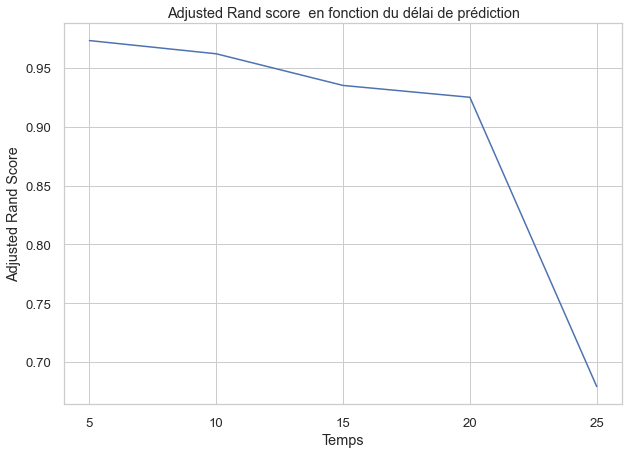

In [180]:
plt.figure(figsize=(10,7))

sns.set(font_scale = 1.2)
sns.set_style("whitegrid") 
sns.lineplot(x="Temps",y="Adjusted Rand Score",data=rand,markers=True).set(title="Adjusted Rand score  en fonction du délai de prédiction")

D'après les résultats du Rand score il est conseillé de faire une maintenance du clustering tout les 22 jours environ.

In [185]:
F01 = rfm[rfm.Récence>=20]

cluster_F01 = KMeans(n_clusters=4)
modèle_F01 = cluster_F01.fit(F01)

In [186]:
F02 = rfm[rfm.Récence>=0]

cluster_F02 = KMeans(n_clusters=4)
modèle_F02 = cluster_F02.fit(F02)

F02_pred = modèle_F01.predict(F02)

In [187]:
rand = adjusted_rand_score(modèle_F02.labels_, F02_pred)
rand

0.9456850041667961